### <A HREF="https://www.poynter.org/reporting-editing/2017/why-it-worked-a-rhetorical-analysis-of-obamas-speech-on-race-2/">Poynter article on the linguistic devices used in Obama's March 18, 2008 speech on American race relations, often referred to as A More Perfect Union</A>

### <A HREF="https://www.americanrhetoric.com/speeches/barackobamaperfectunion.htm">A More Perfect Union speech</A>

<B>Parallelism</B>
<P>
At the risk of calling to mind the worst memories of grammar class, I invoke the wisdom that parallel constructions help authors and orators make meaning memorable. To remember how parallelism works, think of equal terms to express equal ideas. So Dr. King dreamed that one day his four children "will not be judged by the color of their skin but by the content of their character." (By the content of their character is parallel to by the color of their skin.)</P>
<P>
Back to Obama: "This was one of the tasks we set forth at the beginning of this campaign — to continue the long march of those who came before us, a march for a more just, more equal, more free, more caring and more prosperous America." If you are counting, that's five parallel phrases among 43 words. </P>
<P>

And there are many more:</P>
<P>

 
"…we may not have come from the same place, but we all want to move in the same direction."</P>
<P>

 
"So when they are told to bus their children to a school across town; when they hear that an African America is getting an advantage in landing a good job or a spot in a good college because of an injustice that they themselves never committed; when they're told that their fears about crime in urban neighborhoods are somehow prejudiced, resentment builds over time."</P>
<P>

 
"…embracing the burdens of our past without becoming victims of our past."</P>
<P>
<I>Roy Peter Clark, October 20, 2017, Poynter<I>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
import unicodedata
import re
import stanza
from collections import defaultdict
from textblob import TextBlob
from graphviz import Source
import nltk
from nltk.parse.corenlp import CoreNLPParser
from nltk.parse.corenlp import CoreNLPDependencyParser
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
word_token = TreebankWordTokenizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### <A HREF="https://stanfordnlp.github.io/stanza/getting_started.html">Stanza quickstart guide</A>

In [2]:
# Using Stanford's CoreNLP parser with NLTK
# 1. Download CoreNLP from https://stanfordnlp.github.io/CoreNLP/download.html
# 2. make sure Java is installed, otherwise download and install Java - https://www.java.com/en/download/windows_manual.jsp
# 3. Unzip/extract CoreNLP zip file to a directory
# 4. Go to that directory and open a command terminal, and run the following command...
# 4b. on my laptop its in C:\Users\peter\stanford-corenlp-4.5.2
# 5. java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000
# 6. Now for graphviz if you want to view the parse trees, download from https://graphviz.org/download/ then install
# 7. Now, can run the following python code

In [3]:
nlp = stanza.Pipeline(lang="en") # Initialize the default English pipeline

2023-04-06 16:28:25 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-04-06 16:28:27 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2023-04-06 16:28:27 INFO: Use device: gpu
2023-04-06 16:28:27 INFO: Loading: tokenize
2023-04-06 16:28:29 INFO: Loading: pos
2023-04-06 16:28:30 INFO: Loading: lemma
2023-04-06 16:28:30 INFO: Loading: depparse
2023-04-06 16:28:30 INFO: Loading: sentiment
2023-04-06 16:28:30 INFO: Loading: constituency
2023-04-06 16:28:31 INFO: Loading: ner
2023-04-06 16:28:32 INFO: Done loading processors!


In [4]:
phrase1 = "will not be judged by the color of their skin but by the content of their character."
phrase2 = "we may not have come from the same place, but we all want to move in the same direction."
phrase3 = "embracing the burdens of our past without becoming victims of our past."
phrase4 = "That's one small step for man, one giant leap for mankind."
phrase5 = "We may not have come from the same place but we want to move in the same direction."

In [5]:
doc = nlp(phrase3)
print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')

id: 1	word: embracing	head id: 0	head: root	deprel: root
id: 2	word: the	head id: 3	head: burdens	deprel: det
id: 3	word: burdens	head id: 1	head: embracing	deprel: obj
id: 4	word: of	head id: 6	head: past	deprel: case
id: 5	word: our	head id: 6	head: past	deprel: nmod:poss
id: 6	word: past	head id: 3	head: burdens	deprel: nmod
id: 7	word: without	head id: 8	head: becoming	deprel: mark
id: 8	word: becoming	head id: 1	head: embracing	deprel: advcl
id: 9	word: victims	head id: 8	head: becoming	deprel: obj
id: 10	word: of	head id: 12	head: past	deprel: case
id: 11	word: our	head id: 12	head: past	deprel: nmod:poss
id: 12	word: past	head id: 9	head: victims	deprel: nmod
id: 13	word: .	head id: 1	head: embracing	deprel: punct


In [6]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [7]:
sdp = CoreNLPDependencyParser()
sentence = phrase4
result = list(sdp.raw_parse(sentence))
dep_tree_dot_repr = [parse for parse in result][0].to_dot()
source = Source(dep_tree_dot_repr, filename="dep_tree_p4_nopunc", format='png')
source.view()
# Opens in pop-under window... well isn't that nice!

'dep_tree_p4_nopunc.png'

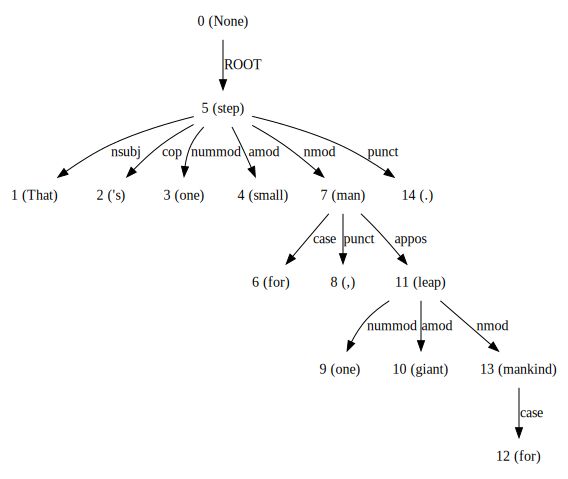

In [8]:
# Graph image doesn't get saved, need to re-run the code
source

In [9]:
parse, = sdp.raw_parse(phrase4)
print(parse.tree())

(step That 's one small (man for , (leap one giant (mankind for))) .)


In [10]:
for gov, dep, dependent in parse.triples():
    print(gov, dep, dependent)

('step', 'NN') nsubj ('That', 'DT')
('step', 'NN') cop ("'s", 'VBZ')
('step', 'NN') nummod ('one', 'CD')
('step', 'NN') amod ('small', 'JJ')
('step', 'NN') nmod ('man', 'NN')
('man', 'NN') case ('for', 'IN')
('man', 'NN') punct (',', ',')
('man', 'NN') appos ('leap', 'NN')
('leap', 'NN') nummod ('one', 'CD')
('leap', 'NN') amod ('giant', 'JJ')
('leap', 'NN') nmod ('mankind', 'NN')
('mankind', 'NN') case ('for', 'IN')
('step', 'NN') punct ('.', '.')


In [11]:
parser = CoreNLPParser()
sent, = parser.parse_text(phrase4)
sent.pretty_print()

                            ROOT                                       
                             |                                          
                             S                                         
  ___________________________|_______________________________________   
 |                           VP                                      | 
 |     ______________________|____                                   |  
 |    |                           NP                                 | 
 |    |         __________________|___                               |  
 |    |        |                      PP                             | 
 |    |        |          ____________|____                          |  
 |    |        |         |                 NP                        | 
 |    |        |         |    _____________|____                     |  
 |    |        |         |   |    |             NP                   | 
 |    |        |         |   |    |         ____|________ 

In [ ]:
sent

In [ ]:
#sent.pos()
#sent.productions()
#sent.pformat_latex_qtree() #compatible with LaTeX qtree package
#sent.height()
for level in range(sent.height()):
    print(sent[level])

In [ ]:
listr = []
def iterate(tree):
    if len(tree) > 1:
        for i in range(len(tree)):
            iterate(tree[i])
    else:
        listr.append(tree)

In [ ]:
iterate(sent[0])
listr

In [ ]:
with open('./Data/barackobamaperfectunion.txt') as f:
    text = f.read()
sents = sent_tokenize(text)

In [ ]:
def count_parallels(text):
    count = 0
    sents = sent_tokenize(text)
    for phrase in sents:
        try:
            sent, = parser.parse_text(phrase)
        except:
            #print('----- PARSE ERROR -----')
            #print(phrase)
            continue
        poss = []
        words = []
        for word in sent.pos():
            poss.append(word[1])
            words.append(word[0])
        #print(words)
        stop = False
        results = []
        for length in range(7,3,-1):
            length = min(length, len(words))
            for i in range(len(poss)-length+1):
                for j in range(len(poss)-length+1):
                    if abs(i-j) > length:
                        if poss[i:i+length]==poss[j:j+length]:
                            if length > 4 or (',' not in poss[i:i+length] and '``' not in poss[i:i+length]):
                                results.append([i,j,length])
                                count += 1
                                stop = True
                                break
                if stop: break
            if stop: break
        '''
        for result in results:
            print(words[result[0]:result[0]+result[2]])
            print(words[result[1]:result[1]+result[2]])
            print()
        '''
    return(len(sents), count)

In [7]:
oba = pd.read_csv('text_sentences_words.csv')
gwb = pd.read_csv('text_sentences_words_gwb.csv')
oba = oba.query('source == "oba"')
oba_text = oba[['text', 'date']]
oba_text['sent_count'] = 0
oba_text['parallel_count'] = 0
gwb_text = gwb[['text', 'date']]
gwb_text['sent_count'] = 0
gwb_text['parallel_count'] = 0

C:\Users\peter\AppData\Local\Temp\ipykernel_22040\2984996246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oba_text['sent_count'] = 0
C:\Users\peter\AppData\Local\Temp\ipykernel_22040\2984996246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oba_text['parallel_count'] = 0
C:\Users\peter\AppData\Local\Temp\ipykernel_22040\2984996246.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
for i in range(len(gwb_text.text)):
    sent_count, parallel_count = count_parallels(gwb_text.text[i])
    gwb_text['sent_count'].iloc[i] = sent_count
    gwb_text['parallel_count'].iloc[i] = parallel_count

In [ ]:
gwb_text['parallel_per_sent']=gwb_text.parallel_count/gwb_text.sent_count

In [ ]:
#gwb_text.to_csv('parallelism_gwb.csv', index=False)

In [ ]:
for i in range(len(oba_text.text)):
    sent_count, parallel_count = count_parallels(oba_text.text[i])
    oba_text['sent_count'].iloc[i] = sent_count
    oba_text['parallel_count'].iloc[i] = parallel_count
oba_text['parallel_per_sent']=oba_text.parallel_count/oba_text.sent_count

In [ ]:
oba_text.to_csv('parallelism_oba.csv', index=False)

### Find Parallelism in a specific speech

In [12]:
file = './Data/barackobamaselma50anniversarymarch.txt'
with open(file, encoding='utf-8') as f:
    text = f.read()

In [14]:
sents = sent_tokenize(text)
count = 0
for phrase in sents:
    try:
        sent, = parser.parse_text(phrase)
    except:
        print('----- PARSE ERROR -----')
        print(phrase)
        continue
    poss = []
    words = []
    for word in sent.pos():
        poss.append(word[1])
        words.append(word[0])

    stop = False
    results = []
    for length in range(7,3,-1):
        length = min(length, len(words))
        for i in range(len(poss)-length+1):
            for j in range(len(poss)-length+1):
                if abs(i-j) > length:
                    if poss[i:i+length]==poss[j:j+length]:
                        if length > 4 or (',' not in poss[i:i+length] and '``' not in poss[i:i+length]):
                            results.append([i,j,length])
                            count += 1
                            stop = True
                            break
            if stop: break
        if stop: break
    
    for result in results:
        print(words[result[0]:result[0]+result[2]])
        print(words[result[1]:result[1]+result[2]])
        print()

['test', ',', 'God', 'will', 'take', 'care', 'of']
['breast', ',', 'God', 'will', 'take', 'care', 'of']

['for', 'a', 'night', 'behind']
['of', 'the', 'church', 'on']

[',', 'Independence', 'Hall', 'and', 'Seneca']
[',', 'Kitty', 'Hawk', 'and', 'Cape']

['turbulent', 'history', ',', 'the', 'stain', 'of', 'slavery']
['civil', 'war', ';', 'the', 'yoke', 'of', 'segregation']

['a', 'clash', 'of', 'armies']
['a', 'clash', 'of', 'wills']

['John', 'Lewis', ',', 'Joseph', 'Lowery', ',', 'Hosea']
['Amelia', 'Boynton', ',', 'Diane', 'Nash', ',', 'Ralph']

['and', 'a', 'fair', 'America', ',', 'an']
['and', 'a', 'generous', 'America', ',', 'that']

----- PARSE ERROR -----
They did as Scripture instructed: “Rejoice in hope, be patient in tribulation, be constant in prayer.” And in the days to come, they went back again and again.
----- PARSE ERROR -----
And he would send them protection, and speak to the nation, echoing their call for America and the world to hear: “We shall overcome.” What enorm

In [19]:
sent1 = 'Meanwhile, the Voting Rights Act, the culmination of so much blood, so much sweat and tears, the product of so much sacrifice in the face of wanton violence, the Voting Rights Act stands weakened, its future subject to political rancor.'
sent2 = 'It’s the same instinct that drew immigrants from across oceans and the Rio Grande; the same instinct that led women to reach for the ballot, workers to organize against an unjust status quo; the same instinct that led us to plant a flag at Iwo Jima and on the surface of the Moon.'
sent3 = 'In one afternoon 50 years ago, so much of our turbulent history, the stain of slavery and anguish of civil war; the yoke of segregation and tyranny of Jim Crow; the death of four little girls in Birmingham; and the dream of a Baptist preacher, all that history met on this bridge.'
sent4 = 'For everywhere in this country, there are first steps to be taken, there’s new ground to cover, there are more bridges to be crossed.'

In [16]:
sdp = CoreNLPDependencyParser()
sentence = sent1
result = list(sdp.raw_parse(sentence))
dep_tree_dot_repr = [parse for parse in result][0].to_dot()
source = Source(dep_tree_dot_repr, filename="dep_tree_culmination_product", format='png')
source.view()

'dep_tree_culmination_product.png'

In [17]:
sentence = sent2
result = list(sdp.raw_parse(sentence))
dep_tree_dot_repr = [parse for parse in result][0].to_dot()
source = Source(dep_tree_dot_repr, filename="dep_tree_instinct", format='png')
source.view()

'dep_tree_instinct.png'

In [18]:
sentence = sent3
result = list(sdp.raw_parse(sentence))
dep_tree_dot_repr = [parse for parse in result][0].to_dot()
source = Source(dep_tree_dot_repr, filename="dep_tree_turbulent_history", format='png')
source.view()

'dep_tree_turbulent_history.png'

In [20]:
sentence = sent4
result = list(sdp.raw_parse(sentence))
dep_tree_dot_repr = [parse for parse in result][0].to_dot()
source = Source(dep_tree_dot_repr, filename="dep_tree_steps_to_be_taken", format='png')
source.view()

'dep_tree_steps_to_be_taken.png'

In [21]:
parser = CoreNLPParser()
sent, = parser.parse_text(sent4)
sent.pretty_print()

                                                                                 ROOT                                                                                        
                                                                                  |                                                                                           
                                                                                  S                                                                                          
         _________________________________________________________________________|________________________________________________________________________________________   
        |                                                              PRN                                                   |               |                             | 
        |                             __________________________________|_______________________________________________     |  

### Add parallelism data to tidy data, maybe create an obama only tidy data

In [2]:
par_oba = pd.read_csv('parallelism_oba.csv')
par_gwb = pd.read_csv('parallelism_gwb.csv')
par_oba.drop(['text', 'sent_count'], axis=1, inplace=True)
par_gwb.drop(['text', 'sent_count'], axis=1, inplace=True)
tidy = pd.read_csv('tidy_data.csv')
tidy_gwb = pd.read_csv('tidy_data_gwb.csv')
tidy_oba = tidy.query('source == "oba"')
tidy_oba = pd.merge(tidy_oba, par_oba, how='left', on='date')
tidy_gwb = pd.merge(tidy_gwb, par_gwb, how='left', on='date')

In [3]:
set(tidy_gwb.columns) == set(tidy_oba.columns)

True

In [4]:
#tidy_oba.to_csv('tidy_data_oba.csv', index=False)
#tidy_gwb.to_csv('tidy_data_gwb.csv', index=False)